<a href="https://www.kaggle.com/code/joovictorcarvalho/exerc-cio-extra-jo-o-victor-ra-110257?scriptVersionId=110504909" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div align="center">
 <img src="https://raw.githubusercontent.com/matheusmota/dataviz2018/master/resources/images/logo_facens_pos.png" width="150px">
 <h1> Dataviz - Data Science Specialization Program - FACENS</h1>
</div>
<br><br>
# Exercício Extra

* **Data de entrega:** 08/02/2020 
* **Professor:**  Matheus Mota
* **Aluno:** João Victor de Carvalho Pinto
* **RA:** 110257

## Questão única

Desenvolva e documente ao longo deste notebook a **sua** análise exploratória do dataset `BlackFriday.csv`.

Sugestão de roteiro:

1. Classificação das variáveis (não esqueça de apresentar as frequências absolutas e relativas das variáveis qualitativas nominais)

2. Resumo, avaliação e correção de eventuais problemas nos valores das variáveis

3. Exame gráfico dos dados

    3.1. Resumo/comportamento dos valores (linha(s), setores, barra(s), diagrama de dispersão) 
    
    3.2. Distribuição dos valores (histograma, diagrama de caixa)
    
    3.3. Relações entre as variáveis (mapa de calor, diagrama de dispersão)
        
4. Pelo menos três análises da distribuição por grupos/recortes (exemplo: como ficam os histogramas de idade por categoria de produtos?)
    
5. Conclusão: Hipóteses e observações

# 1 - Conhecendo o DataSet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('../input/dataviz-facens-20182-ex3/BlackFriday.csv')

In [3]:
dados.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
variaveis = [["Gender",                    "Qualitativa Nominal"],
            ["Age",                        "Qualitativa Nominal"],
            ["Occupation",                 "Qualitativa Nominal"],
            ["City_Category",              "Qualitativa Nominal"],            
            ["Stay_In_Current_City_Years", "Qualitativa Discreta"],
            ["Marital_Status",             "Qualitativa Nominal"],
            ["Product_Category_1",         "Qualitativa Nominal"],
            ["Product_Category_2",         "Qualitativa Nominal"],
            ["Product_Category_3",         "Qualitativa Nominal"],
            ["Purchase",                   "Qualitativa Discreta"]
           ] 

variaveis = pd.DataFrame(variaveis, columns=["Variável", "Classificação"])
variaveis

,Variável,Classificação
0,Gender,Qualitativa Nominal
1,Age,Qualitativa Nominal
2,Occupation,Qualitativa Nominal
3,City_Category,Qualitativa Nominal
4,Stay_In_Current_City_Years,Qualitativa Discreta
5,Marital_Status,Qualitativa Nominal
6,Product_Category_1,Qualitativa Nominal
7,Product_Category_2,Qualitativa Nominal
8,Product_Category_3,Qualitativa Nominal
9,Purchase,Qualitativa Discreta


In [5]:
dados.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


# Distribuição e Frequência dos valores Nominais

In [6]:
l1 = list(dados.Age.unique())
l1.sort()
l1

['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

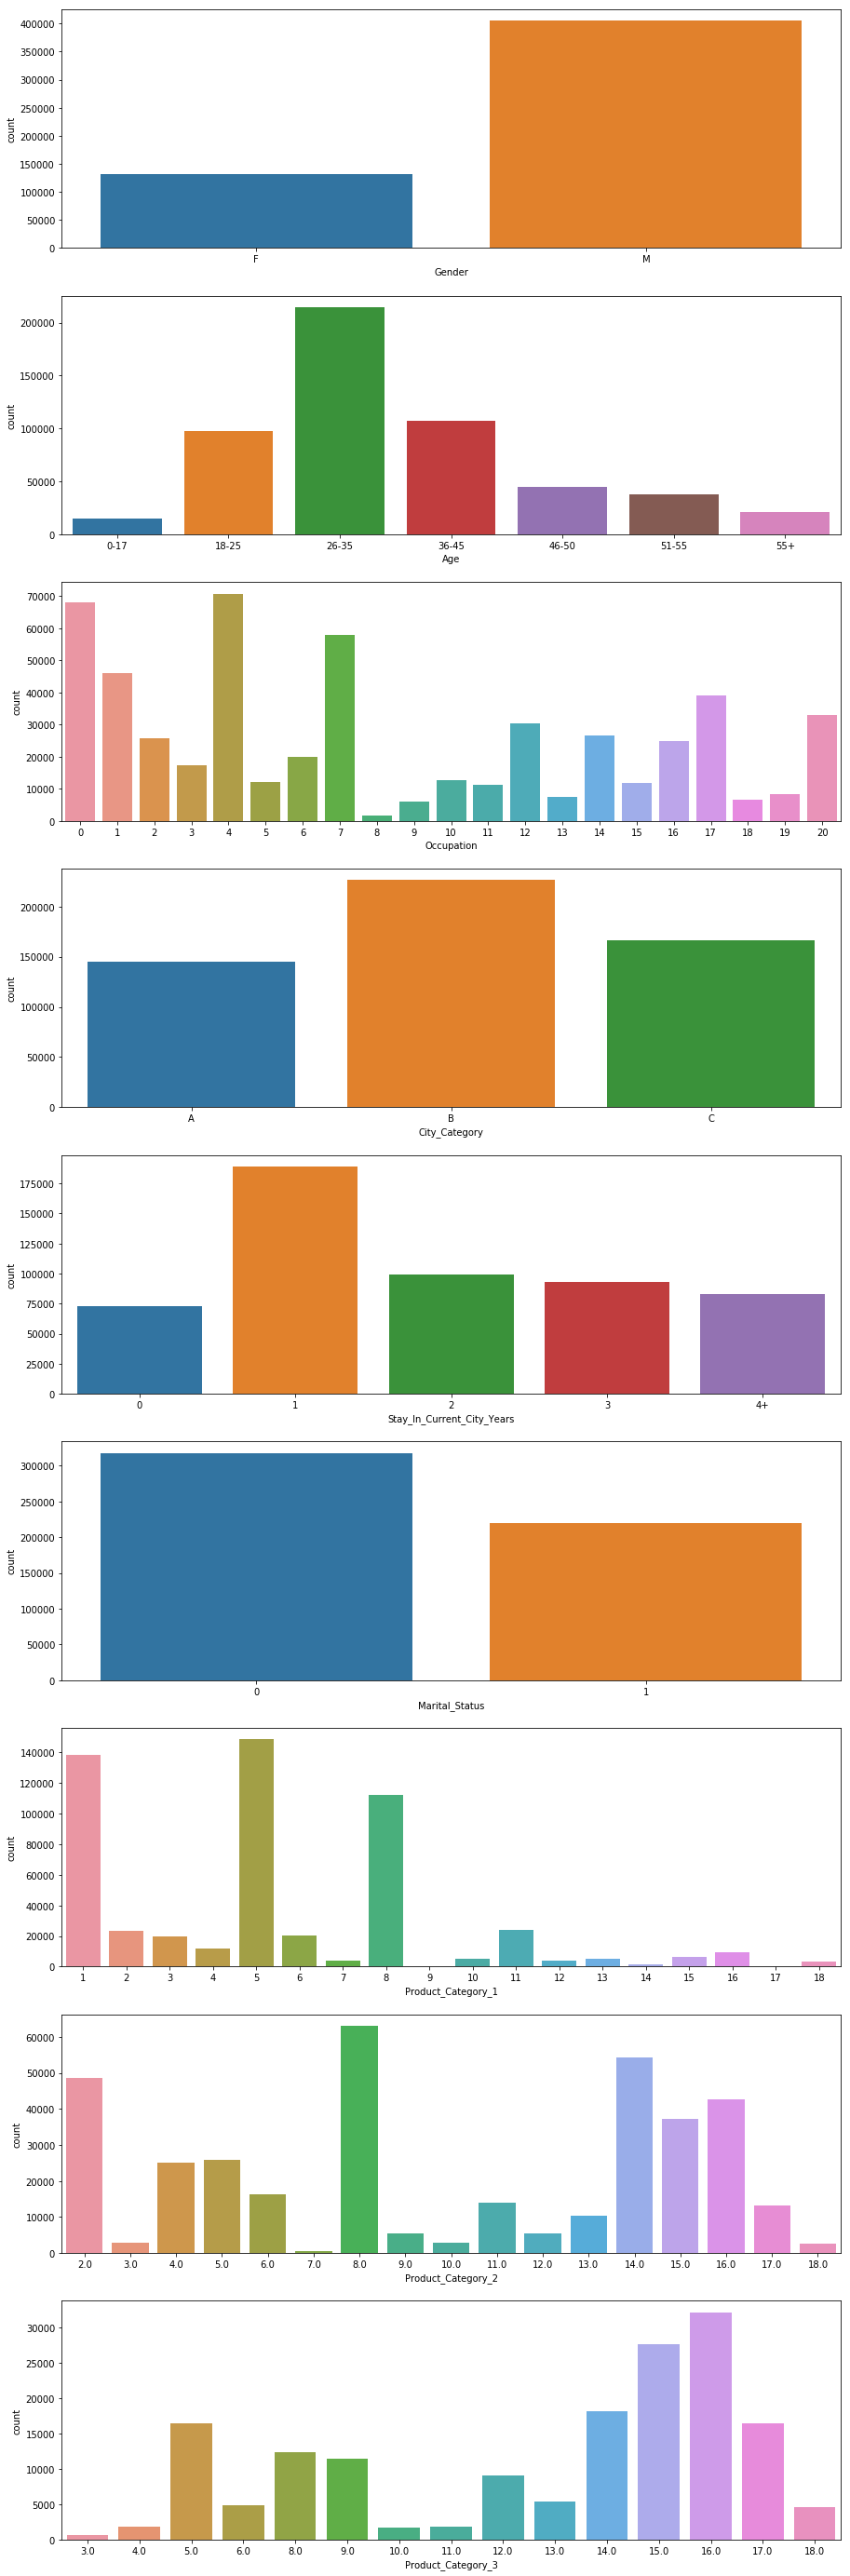

In [7]:
fig, axes = plt.subplots(nrows=9, ncols=1,figsize=(15,50))

ax = sns.countplot(x = 'Gender',data = dados, ax=axes[0])
ax = sns.countplot(x = 'Age',data = dados, ax=axes[1], order = l1)
ax = sns.countplot(x = 'Occupation',data = dados, ax=axes[2])
ax = sns.countplot(x = 'City_Category',data = dados, ax=axes[3], order=["A", "B", 'C'])
ax = sns.countplot(x = 'Stay_In_Current_City_Years',data = dados, ax=axes[4], order = ['0','1','2','3','4+'])
ax = sns.countplot(x = 'Marital_Status',data = dados, ax=axes[5])
ax = sns.countplot(x = 'Product_Category_1',data = dados, ax=axes[6])
ax = sns.countplot(x = 'Product_Category_2',data = dados, ax=axes[7])
ax = sns.countplot(x = 'Product_Category_3',data = dados, ax=axes[8])

# 2 - Análise de valores NaN e discrepantes

In [8]:
def verifyMissing(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round((df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = True),2)
    data_missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return data_missing[data_missing.Total>0]

In [9]:
verifyMissing(dados)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Total,Percent
Product_Category_2,166986,31.06
Product_Category_3,373299,69.44


In [10]:
dados.Product_Category_2.fillna('NA', inplace=True)
dados.Product_Category_3.fillna('NA', inplace=True)

In [11]:
verifyMissing(dados)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Total,Percent


### Como as colunas 'Product_Category_2' e 'Product_Category_3' são categorias secundárias optou-se por deixar os valores como NaN pois não influencia na análise final

# 3 - Exame Gráfico dos Dados

### Análise de Distribuição da coluna 'Purchase'

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


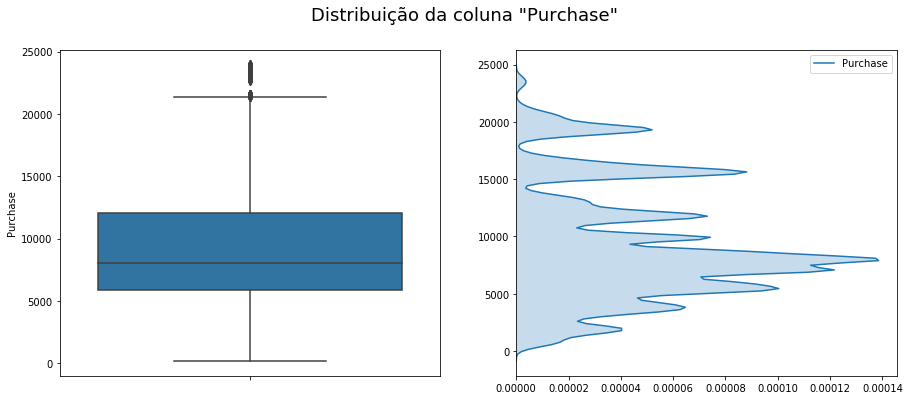

In [12]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,6))

plt.suptitle('Distribuição da coluna "Purchase"', color = 'black', fontsize='18')

ax = sns.boxplot(y = dados['Purchase'], ax = axes[0])
ax = sns.kdeplot(dados['Purchase'], shade=True, vertical=True, ax = axes[1])

### Com o gráfico abaixo podemos notar a distribuição de preços entre as categorias dos produtos

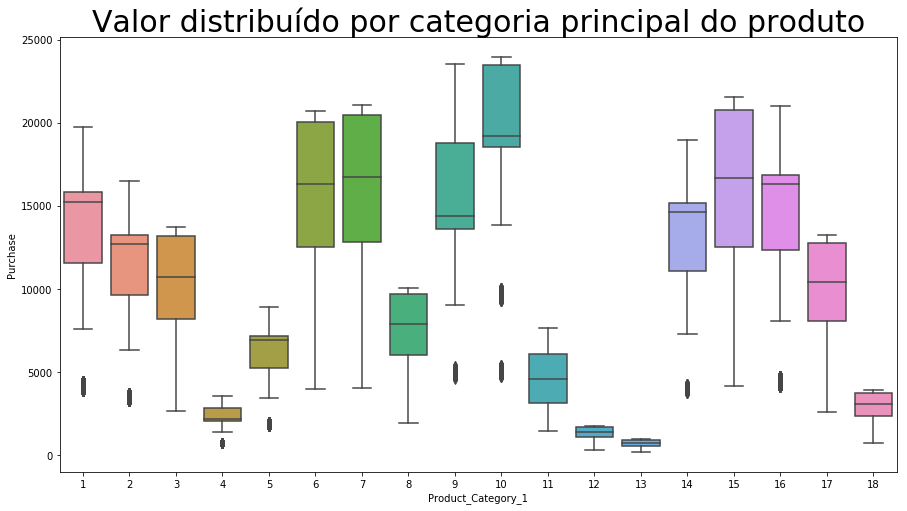

In [13]:
fig, axes = plt.subplots(figsize=(15,8))

plt.title('Valor distribuído por categoria principal do produto', color = 'black', fontsize='30', horizontalalignment='center')

sns.boxplot(x = dados['Product_Category_1'],y = dados['Purchase'])


### Análise da correlação entre variáveis

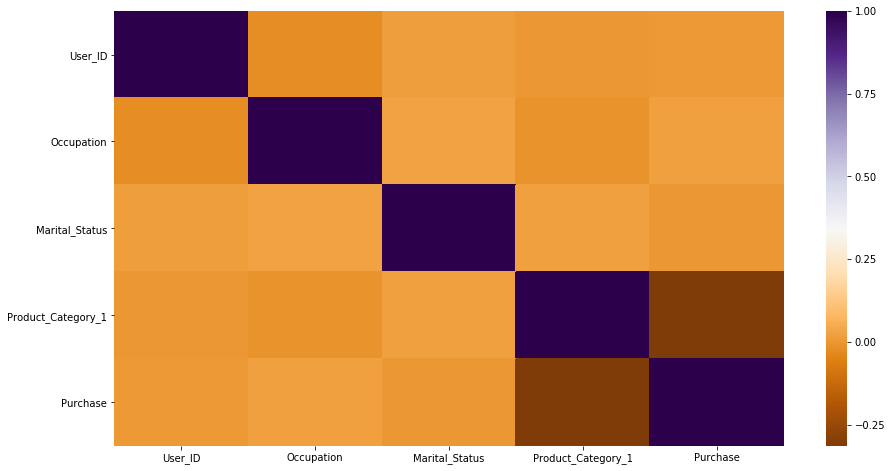

In [14]:
corr_matrix=dados.corr()

fig, axes = plt.subplots(figsize=(15,8))

sns.heatmap(corr_matrix, cmap='PuOr')


<BarContainer object of 5 artists>

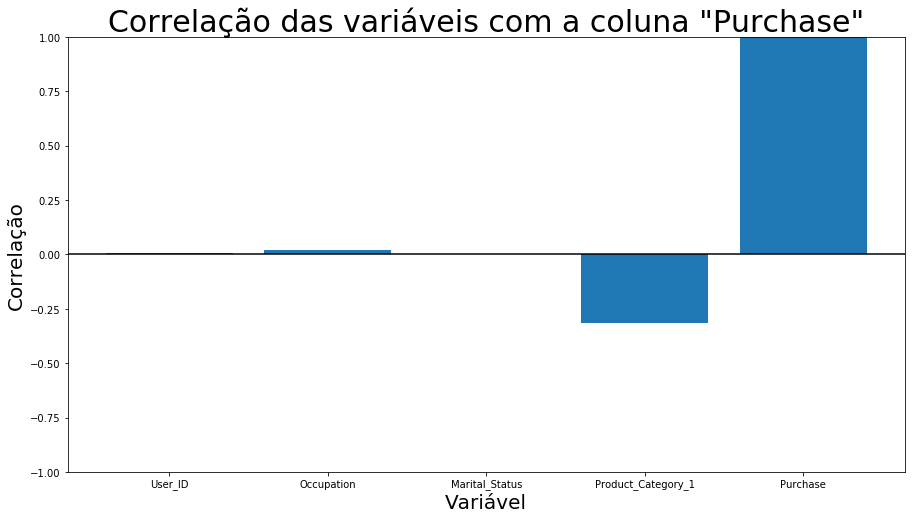

In [15]:
fig, axes = plt.subplots(figsize=(15,8))

plt.title('Correlação das variáveis com a coluna "Purchase"', color = 'black', fontsize='30', horizontalalignment='center')

axes.set_ylabel('Correlação', fontsize = 20)
axes.set_xlabel('Variável', fontsize = 20)

plt.ylim([-1,1])
plt.axhline(0, color='black')
plt.bar(corr_matrix.Purchase.index, corr_matrix.Purchase.values)

### Criando dummies para as variáveis nominais

In [16]:
s = pd.get_dummies(dados[['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']])
s['Purchase'] = dados['Purchase']
s.head()

,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Purchase
0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,8370
1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,15200
2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1422
3,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1057
4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,7969


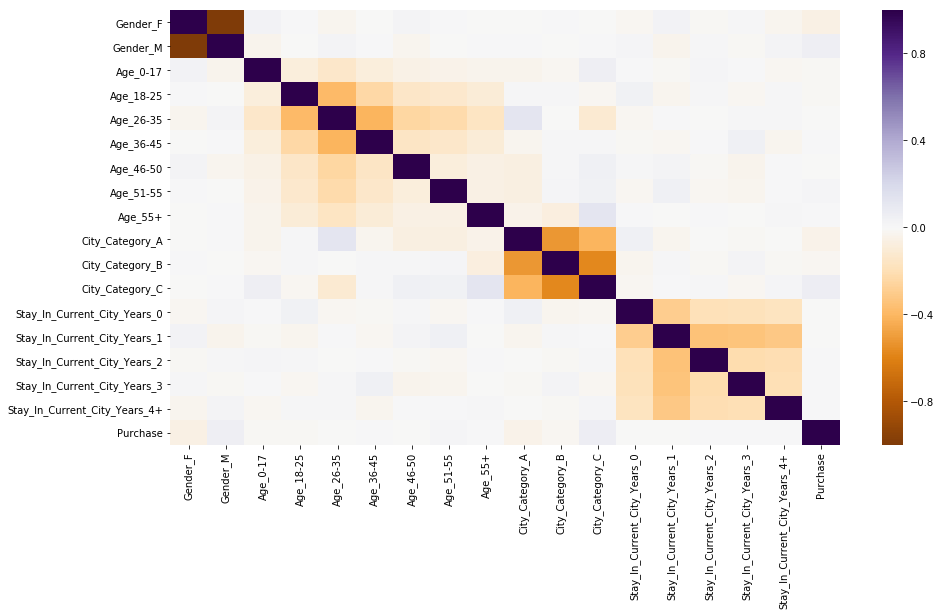

In [17]:
corr_matrix2=s.corr()

fig, axes = plt.subplots(figsize=(15,8))

sns.heatmap(corr_matrix2, cmap='PuOr')

<BarContainer object of 18 artists>

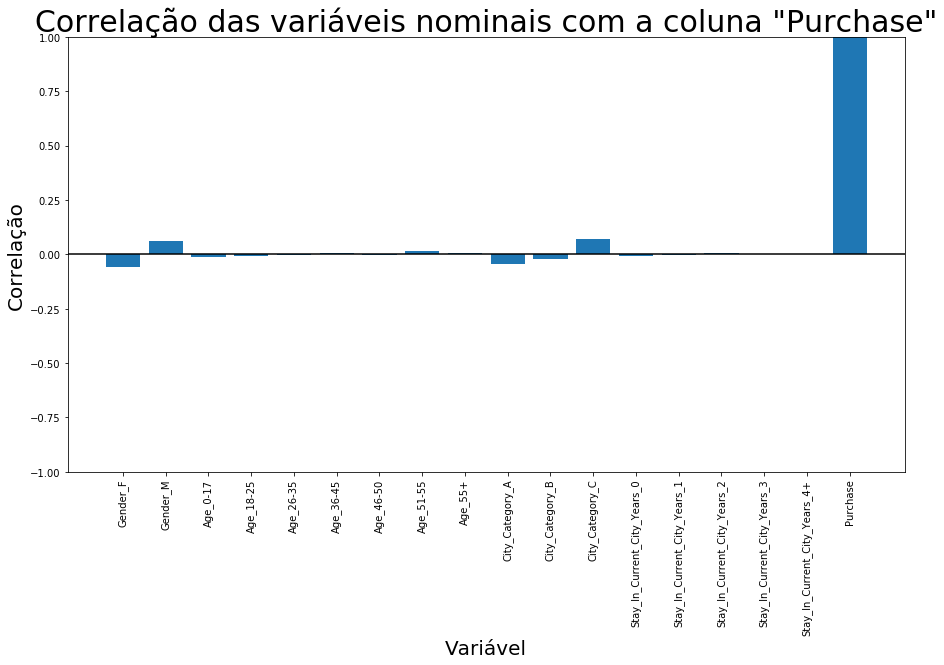

In [18]:
fig, axes = plt.subplots(figsize=(15,8))

plt.title('Correlação das variáveis nominais com a coluna "Purchase"', color = 'black', fontsize='30', horizontalalignment='center')

axes.set_ylabel('Correlação', fontsize = 20)
axes.set_xlabel('Variável', fontsize = 20)
plt.xticks(rotation=90)


plt.ylim([-1,1])
plt.axhline(0, color='black')
plt.bar(corr_matrix2.Purchase.index, corr_matrix2.Purchase.values)

### Como notado nos gráficos de correlação, nenhuma variável tem uma forte influência sobre a coluna 'Purchase'.

# 4 - Exploração e Estudo Gráfico dos Dados

## 4.1 - Como os clientes estão distribuídos por cidade?

In [19]:
group_names=['Cidade A', 'Cidade B', 'Cidade C']
group_size=[144638,226493,166446]
subgroup_names=['Homens-A', 'Mulheres-A', 'Homens-B', 'Mulheres-B', 'Homens-C', 'Mulheres-C']
subgroup_size= list(dados.groupby('City_Category')['Gender'].value_counts().values)

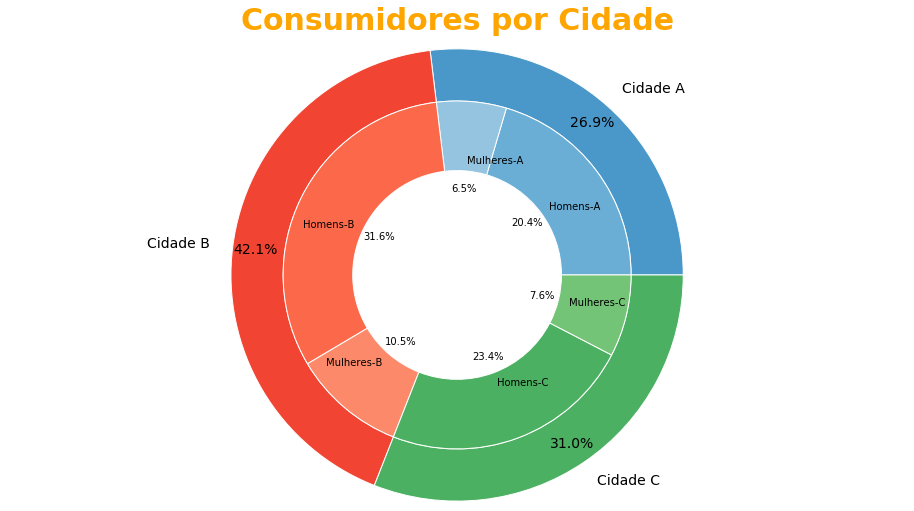

In [20]:
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]

fig, ax = plt.subplots(figsize = (16,8))
ax.axis('equal')
mypie, _, _ = ax.pie(group_size, 
                     radius=1.3, 
                     labels=group_names, 
                     colors=[a(0.6), b(0.6), c(0.6)], 
                     autopct="%.1f%%",
                     pctdistance=0.9, 
                     labeldistance=1.1,
                     textprops={'fontsize': 14})

plt.setp( mypie, width=0.3, edgecolor='white')

mypie2, _, _ = ax.pie(subgroup_size, 
                   radius=1.3-0.3, 
                   labels=subgroup_names, 
                   labeldistance=0.66, 
                   colors=[a(0.5), a(0.4), b(0.5), b(0.4), c(0.6), c(0.5)],
                   autopct="%.1f%%",
                    pctdistance=0.5)

plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
plt.title('Consumidores por Cidade', fontweight='bold', color = 'orange', fontsize='30', horizontalalignment='center')
ttl = ax.title
ttl.set_position([.5, 1.05])
    
plt.show()

## 4.2 - Qual faixa etária realizou mais compras?

<BarContainer object of 7 artists>

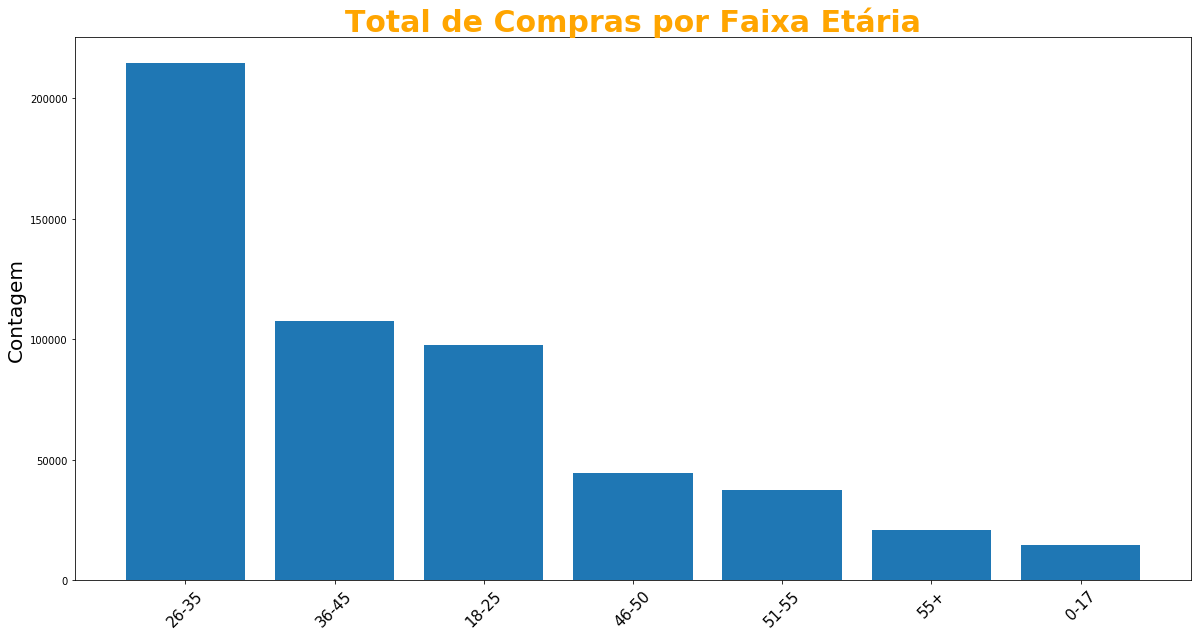

In [21]:
idade = dados['Age'].value_counts()


fig, ax = plt.subplots(figsize=(20,10))
ax.set_ylabel('Contagem', fontsize = '20')
ax.set_xticklabels(idade.index, fontsize = '20')
plt.xticks(rotation=45)

    
plt.tick_params(axis='x', which='major', labelsize=15)
plt.title('Total de Compras por Faixa Etária', fontweight='bold', color = 'orange', fontsize='30', horizontalalignment='center')

plt.bar(idade.index, idade.values)

## 4.3 - Qual produto vendeu mais?

In [22]:
prod1 = dados.groupby('Product_ID')['Purchase'].sum()
prod2 = dados.Product_ID.value_counts().head(30)


<BarContainer object of 30 artists>

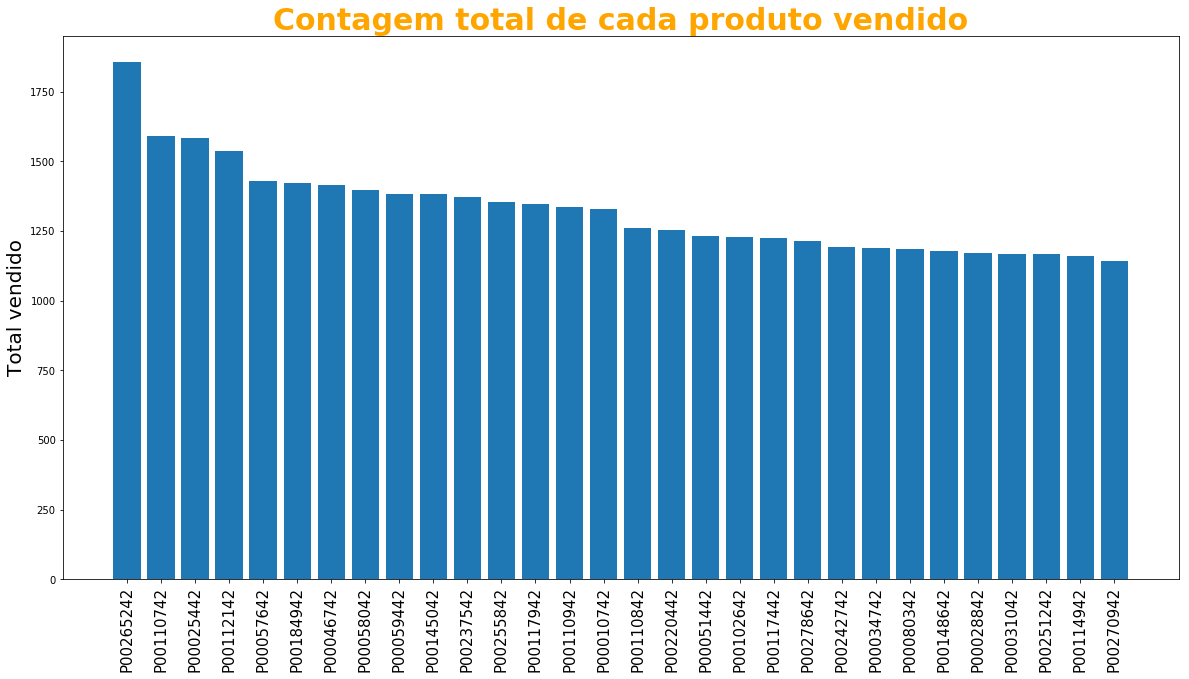

In [23]:
width = .6

fig, ax = plt.subplots(figsize=(20,10))
ax.set_ylabel('Total vendido', fontsize = '20')
plt.xticks(rotation=90)

plt.tick_params(axis='x', which='major', labelsize=15)
plt.title('Contagem total de cada produto vendido', fontweight='bold', color = 'orange', fontsize='30', horizontalalignment='center')

plt.bar(prod2.index, prod2.values)

## 4.4 - Qual perfil de cliente mais gastou em compras?

In [24]:
sx = dados[['Age','Gender', 'Marital_Status','Purchase']]
sx_g = sx.groupby(['Gender', 'Marital_Status', 'Age']).sum()
bar1 = list(sx_g.Purchase[0:7])
bar2 = list(sx_g.Purchase[7:13])
bar3 = list(sx_g.Purchase[13:20])
bar4 = list(sx_g.Purchase[20:])


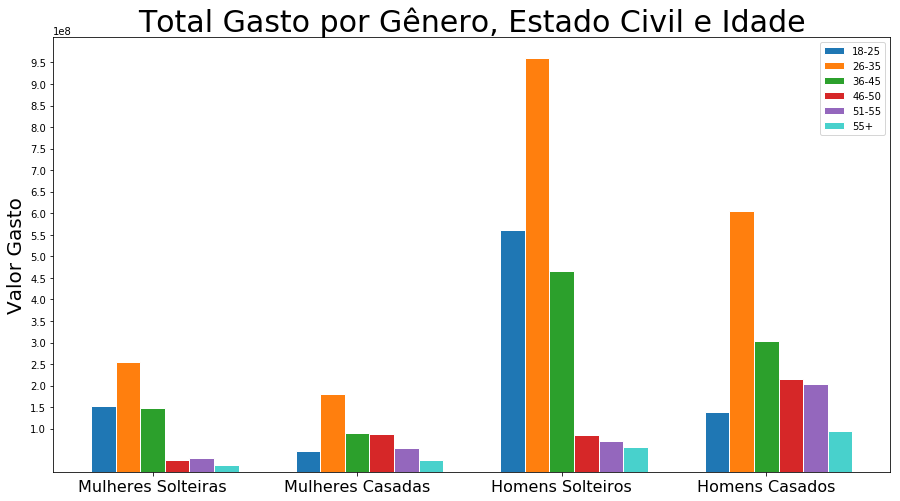

In [25]:
fig, ax = plt.subplots(figsize=(15,8))

barWidth = 0.12

bar1 = list(sx_g.Purchase[[1,7,14,20]])
bar2 = list(sx_g.Purchase[[2,8,15,21]])
bar3 = list(sx_g.Purchase[[3,9,16,22]])
bar4 = list(sx_g.Purchase[[4,10,17,23]])
bar5 = list(sx_g.Purchase[[5,11,18,24]])
bar6 = list(sx_g.Purchase[[6,12,19,25]])


r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]


plt.bar(r1, bar1, color='tab:blue', width=barWidth, edgecolor='white', label='18-25')
plt.bar(r2, bar2, color='tab:orange', width=barWidth, edgecolor='white', label='26-35')
plt.bar(r3, bar3, color='tab:green', width=barWidth, edgecolor='white', label='36-45')
plt.bar(r4, bar4, color='tab:red', width=barWidth, edgecolor='white', label='46-50')
plt.bar(r5, bar5, color='tab:purple', width=barWidth, edgecolor='white', label='51-55')
plt.bar(r6, bar6, color='mediumturquoise', width=barWidth, edgecolor='white', label='55+')

plt.title('Total Gasto por Gênero, Estado Civil e Idade',color = 'black', fontsize='30', horizontalalignment='center')
plt.xticks([r + 2*barWidth for r in range(len(bar1))], ['Mulheres Solteiras', 'Mulheres Casadas', 'Homens Solteiros', 'Homens Casados'], fontsize = 16)
ax.set_ylabel('Valor Gasto', fontsize = '20')
plt.yticks(np.arange(100000000, max(bar2)+10000000, 50000000))

plt.legend()
plt.show()

## 4.5 Qual cidade gasta mais e qual a categoria mais comprada? Por quanto tempo de moradia?

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0.98, 'Categoria mais comprada e Média de gasto por cidade.')

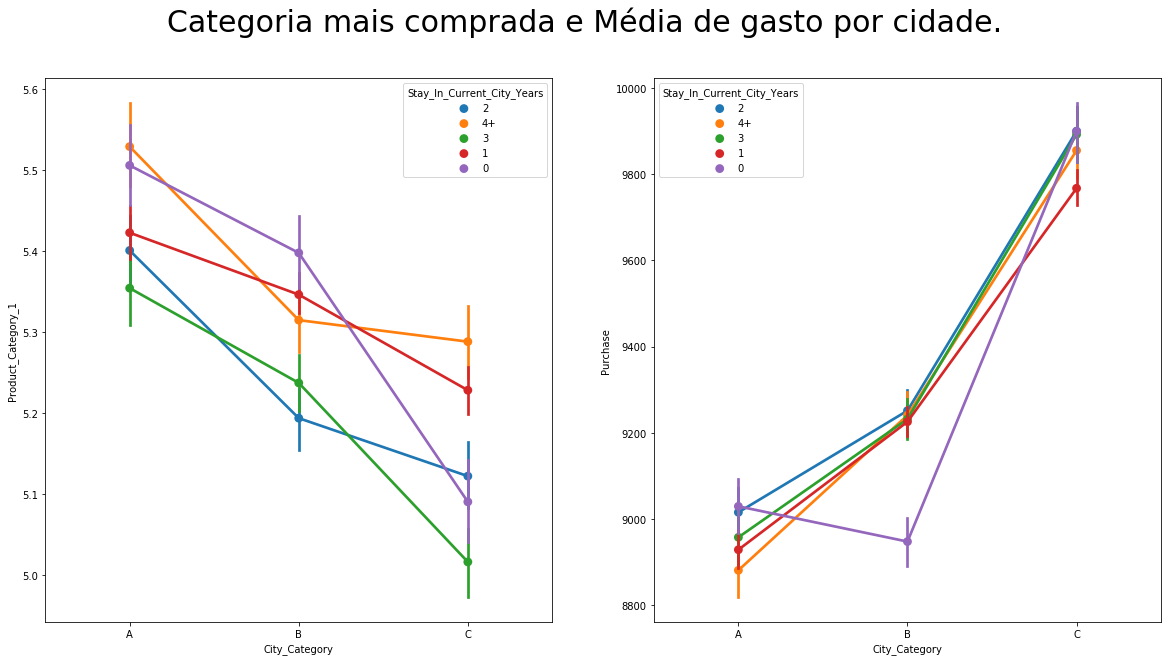

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,10))

ax = sns.pointplot(y='Product_Category_1', x='City_Category',hue='Stay_In_Current_City_Years',
                 data=dados,
                 ax=axes[0],
                 order=["A", "B", 'C'])

ax = sns.pointplot(y='Purchase', x='City_Category', hue='Stay_In_Current_City_Years',
                 data=dados,
                 ax=axes[1],
                 order=["A", "B", 'C'])

plt.suptitle('Categoria mais comprada e Média de gasto por cidade.',color = 'black', fontsize='30')


## 4.6 - Qual categoria de produto é o mais caro? E qual vendeu mais?

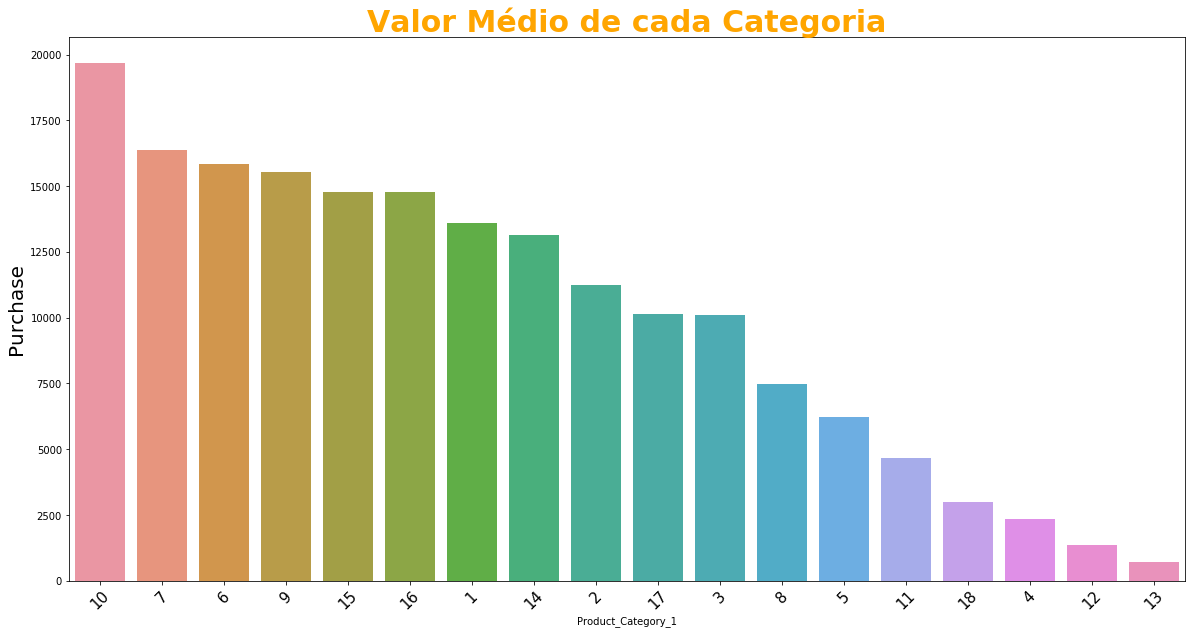

In [27]:
custo = dados.groupby('Product_Category_1').mean()
df_cust = custo.sort_values('Purchase', ascending = False)

fig, ax = plt.subplots(figsize=(20,10))
ax.set_ylabel('Contagem', fontsize = '20')
ax.set_xticklabels(df_cust.index, fontsize = '20')
plt.xticks(rotation=45)

    
plt.tick_params(axis='x', which='major', labelsize=15)
plt.title('Valor Médio de cada Categoria', fontweight='bold', color = 'orange', fontsize='30', horizontalalignment='center')

sns.barplot(x = df_cust.index, y = df_cust.Purchase, order = [10, 7, 6, 9, 15, 16, 1, 14, 2, 17, 3, 8, 5, 11, 18, 4, 12, 13])

In [28]:
import squarify  

In [29]:
prod = dados.Product_Category_1.value_counts()


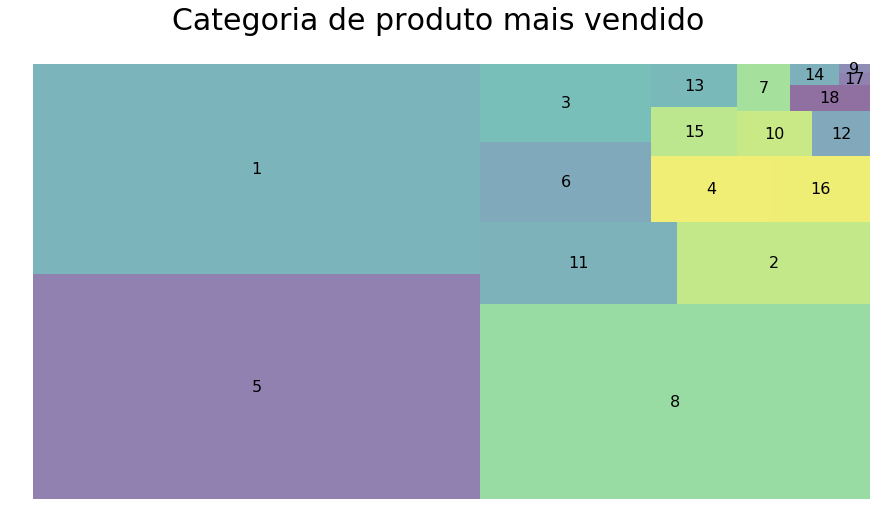

In [30]:
fig, ax = plt.subplots(figsize=(15,8))

plt.suptitle('Categoria de produto mais vendido',color = 'black', fontsize='30', horizontalalignment='center')

squarify.plot(sizes=prod.values, label=prod.index, alpha=.6, text_kwargs={'fontsize':16})
plt.axis('off')
plt.show() 

## 4.7 - Como os homens e mulheres estão distribuídos por ocupação? Qual tipo de ocupação gasta mais?

In [31]:
gn = dados['Gender'].groupby(dados['Occupation']).apply(lambda x: x.value_counts().head(2))
gn_df = pd.DataFrame(gn)
gn_df.reset_index(inplace=True)


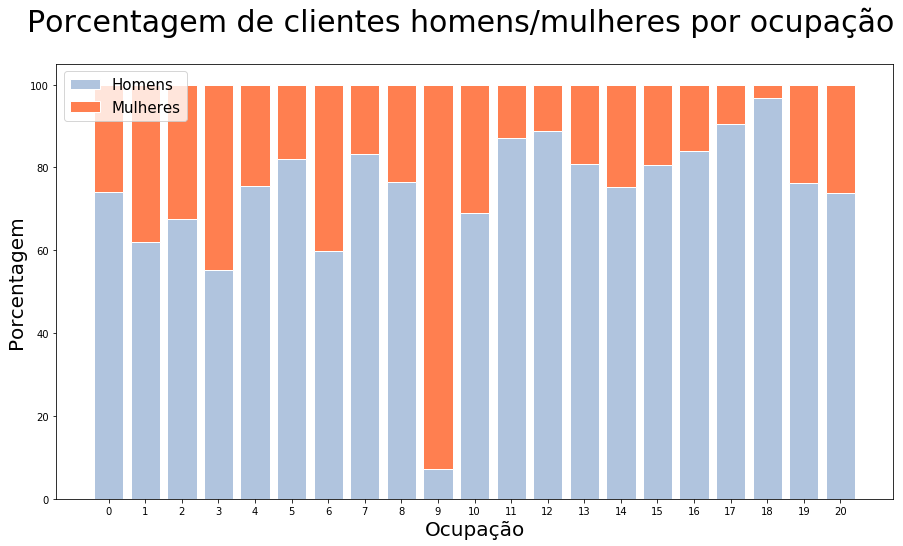

In [32]:
r = list(gn_df.Occupation.unique())

bar1 = list(gn_df.Gender.where(gn_df.level_1 == 'M').dropna())
bar2 = list(gn_df.Gender.where(gn_df.level_1 == 'F').dropna())

totals = [i+j for i,j in zip(bar1, bar2)]
barra1 = [i / j * 100 for i,j in zip(bar1, totals)]
barra2 = [i / j * 100 for i,j in zip(bar2, totals)]

fig, ax = plt.subplots(figsize=(15,8))

plt.suptitle('Porcentagem de clientes homens/mulheres por ocupação',color = 'black', fontsize='30', horizontalalignment='center')

plt.bar(r, barra1, color='lightsteelblue', edgecolor='white', width=0.8)
plt.bar(r, barra2, bottom=barra1, color='coral', edgecolor='white', width=0.8)

plt.xticks(r)
plt.xlabel("Ocupação", fontsize = 20)
plt.ylabel("Porcentagem", fontsize = 20)
plt.legend(['Homens', 'Mulheres'], fontsize = 15)


# 5 - Conclusão

## Analisando os gráficos acima, podemos notar que

## 1 - As cidades categoria C gastam em média mais dinheiro durante a Black Friday, porém o maior número de clientes vem das cidades categoria B.

## 2 - Os Homens são maioria entre o número de clientes e são os que gastam mais, eles são jovens (de 26 a 35 anos) e solteiros.

## 3 - A ocupação número 4 é a que mais gastou durante esta Black Friday, aonde a maioria de seus trabalhadores são homens.

## 4 - A categoria de produto preferido entre todas cidades são 1, 5 e 8 e o mais caro são os de categoria 10. 